### GOAL
#### To predict departmentwide weekly sales of every store provided historical data of 45 Walmart Stores

## Strategy
### Combine various datasets by Merging to incoporate more features in both training and test datasets
#### Develop a transformation pipeline to transform all the data concatenated together
### Use the pipeline at two instances. 
    First concatenation of training dataset with features and stores
    Second concatenation of training, features amd stores datasets

### Loading modules to work with

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import datetime as dt

In [2]:
os.getcwd()
#os.chdir(path)

'/content'

### Importing our Data

In [3]:
features =pd.read_csv('datasets/walmart/features.csv').drop(columns=['IsHoliday'])
sampleSubmission =pd.read_csv('datasets/walmart/sampleSubmission.csv')
test =pd.read_csv('datasets/walmart/test.csv')
train =pd.read_csv('datasets/walmart/train.csv')
stores =pd.read_csv('datasets/walmart/stores.csv')

#### First Merging

In [4]:
# dataset =  pd.concat(objs=[features,stores,train], axis=0).reset_index(drop=True)
dataset = train.merge(stores,how='left').merge(features,how='left')

#### Data Anaysis through Descriptive Statistics
#### Lets examine our data and get to understand it

In [5]:
dataset.info(memory_usage='Deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Type          421570 non-null  object 
 6   Size          421570 non-null  int64  
 7   Temperature   421570 non-null  float64
 8   Fuel_Price    421570 non-null  float64
 9   MarkDown1     150681 non-null  float64
 10  MarkDown2     111248 non-null  float64
 11  MarkDown3     137091 non-null  float64
 12  MarkDown4     134967 non-null  float64
 13  MarkDown5     151432 non-null  float64
 14  CPI           421570 non-null  float64
 15  Unemployment  421570 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


###### store is the only feature with complete values

In [6]:
print("Dataset has a shape of ", dataset.shape)
print("Dataset has a size of ", dataset.size)
print("Dataset has dimensions  ", dataset.ndim)

Dataset has a shape of  (421570, 16)
Dataset has a size of  6745120
Dataset has dimensions   2


In [7]:
dataset.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [8]:
# Descriptive Analytics
tot_len = len(dataset.columns.tolist())
print('columns present are \n {} \n No of columns is {}'.format(dataset.columns.tolist(),tot_len))
dataset.count() # total number of values per column


columns present are 
 ['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment'] 
 No of columns is 16


Store           421570
Dept            421570
Date            421570
Weekly_Sales    421570
IsHoliday       421570
Type            421570
Size            421570
Temperature     421570
Fuel_Price      421570
MarkDown1       150681
MarkDown2       111248
MarkDown3       137091
MarkDown4       134967
MarkDown5       151432
CPI             421570
Unemployment    421570
dtype: int64

In [9]:
 #described columns to list. Represents numeric features
leng = len(dataset.describe().keys().tolist())
print("No of numeric features is ", leng)
print("Number of non-numeric features are: ", tot_len-leng)

No of numeric features is  13
Number of non-numeric features are:  3


In [10]:
print('Missing Date values are: ')
dataset.isnull().sum()

Missing Date values are: 


Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
dtype: int64

### Markdown can be seen to have large volumes of missing data.
#### We need a strategy to fill missing values



## Data Exploration

In [11]:
# Lets draw a scatter matric against weeklysales
def scatter(dataset,column):
    plt.figure(column)
    plt.scatter(dataset[column],dataset['Weekly_Sales'])
    plt.xlabel(column)
    plt.ylabel('Weekly_Sales')

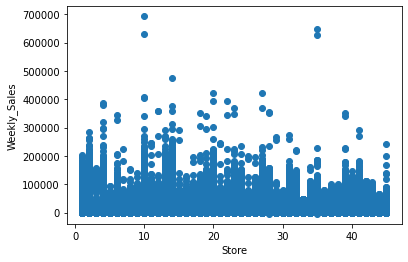

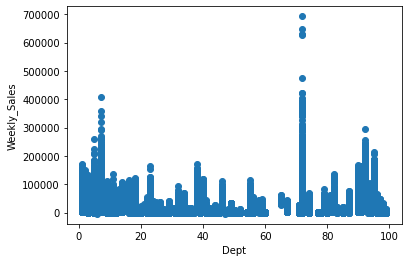

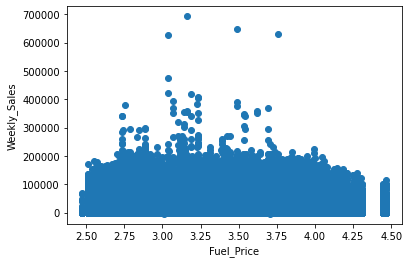

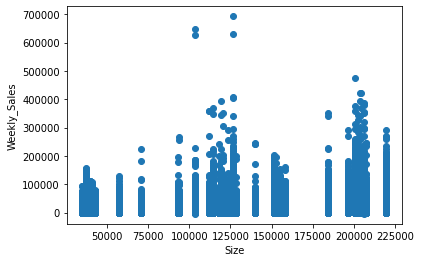

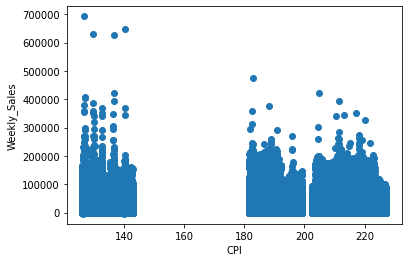

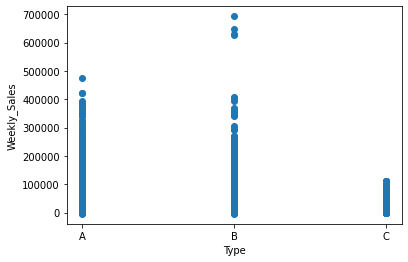

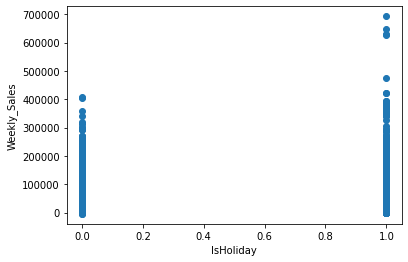

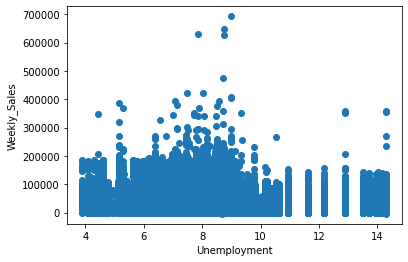

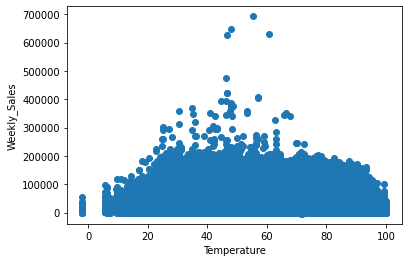

In [12]:
scatter(dataset,'Store')
scatter(dataset,'Dept')
scatter(dataset, 'Fuel_Price')
scatter(dataset, 'Size')
scatter(dataset, 'CPI')
scatter(dataset, 'Type')
scatter(dataset, 'IsHoliday')
scatter(dataset, 'Unemployment')
scatter(dataset, 'Temperature')

### Correlation Matrix

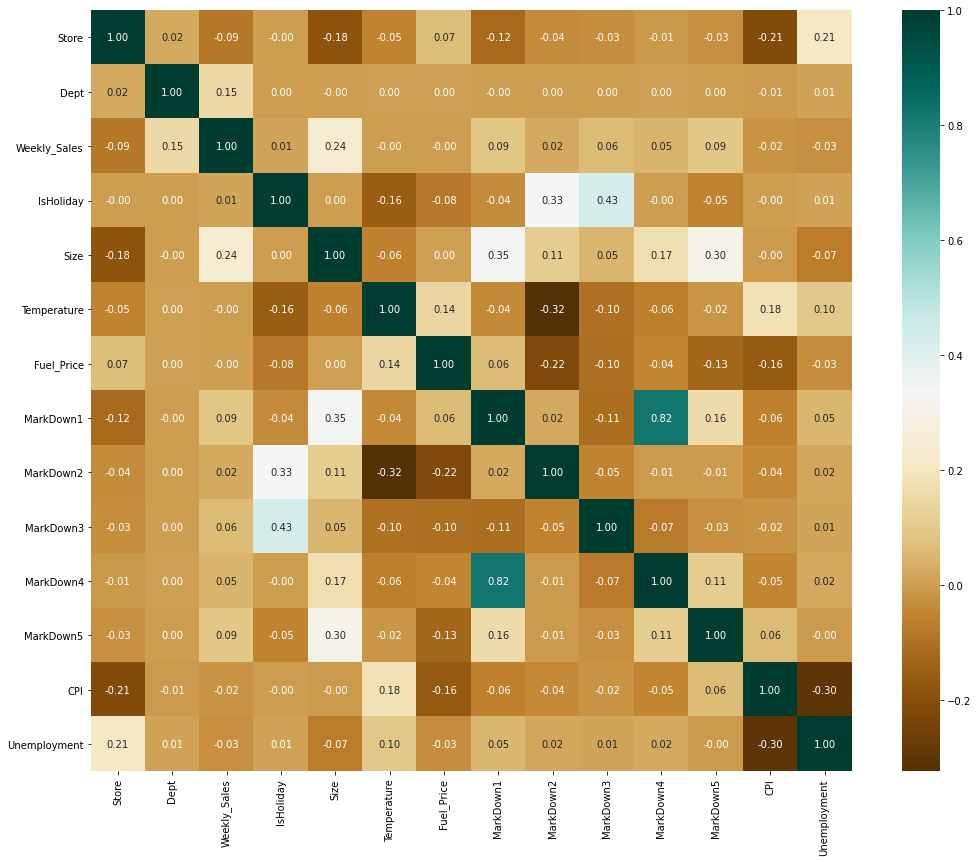

In [13]:
# Lets get a correlation matrix
corr = dataset.corr()
fig1 =plt.figure(figsize=(18,14))
#plt.yticks(np.arange(0.5, len(corr.index), 1), corr.index)
#plt.xticks(np.arange(0.5, len(corr.columns), 1), corr.columns)
sns.heatmap(corr,annot =True,fmt=".2f",cmap="BrBG",square=True)

In [14]:
dataset.groupby(['Store','Dept']).sum()

Weekly_Sales  IsHoliday  ...           CPI  Unemployment
Store Dept                           ...                            
1     1       3219405.18         10  ...  30887.555523      1088.290
      2       6592598.93         10  ...  30887.555523      1088.290
      3       1880518.36         10  ...  30887.555523      1088.290
      4       5285874.09         10  ...  30887.555523      1088.290
      5       3468885.58         10  ...  30887.555523      1088.290
...                  ...        ...  ...           ...           ...
45    94       494496.46         10  ...  24998.806294      1157.523
      95      7564151.83         10  ...  26638.851959      1236.771
      96            5.94          0  ...    382.161746        17.108
      97       924775.55         10  ...  26638.851959      1236.771
      98        75767.27         10  ...  25181.332887      1166.203

[3331 rows x 12 columns]

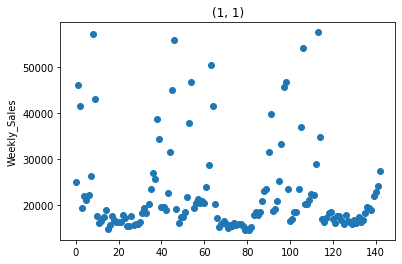

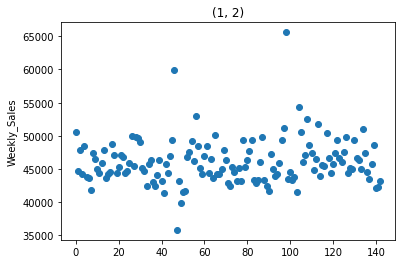

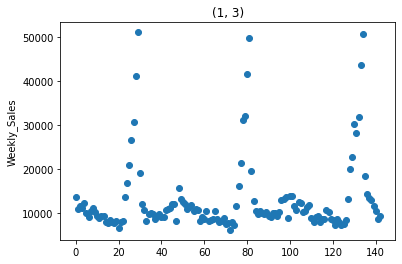

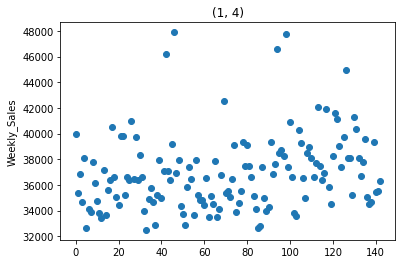

In [15]:
i = 0
for name, group in dataset.groupby(['Store','Dept']):
    plt.title(name)
    plt.scatter(range(len(group)), group["Weekly_Sales"])
    plt.ylabel('Weekly_Sales')
    plt.show()
    i += 1
    if i == 4:
        break

### Data manipulation

### I,ll explore two ways to manipulate the date column, then later see their impact on model perfomance
    * One is transform holidays to an assigned prefix, then later get dummies
    * Two is obtain month from the dates column then drop it later
    *Three is have both the date and in oneHot encoding and month columns

In [16]:
# Lets define the transformer that will handle this task
'''This returns either one of the datasets , dataset A if prefix=True,
    datasetB if month=True and datasetC if both are true'''
datasetA = dataset.copy()
datasetB = dataset.copy()
datasetC = dataset.copy()
def custom_date_transform(dataset,prefix=True,month=False):
    def date_transform(dataset):
        # Replace the SuperBowl holidays with an S.Dates defined in Kaggle 
        dataset.Date.replace(['2010-02-12','2011-02-11','2012-02-10','2013-2-08'],'S',inplace = True)
        # Replace the Labour holidays with an L .Dates defined in Kaggle 
        dataset.Date.replace(['2010-09-10','2011-09-09','2012-09-07','2013-09-06'], 'L' ,inplace = True)
        # Replace the Thanksgiving holidays with a T .Dates defined in Kaggle 
        dataset.Date.replace(['2010-11-26','2011-11-25','2012-11-23','2013-11-29'],'T',inplace = True)
        # Replace the Christmass holidays with a C .Dates defined in Kaggle 
        dataset.Date.replace(['2010-12-31','2011-12-30','2012-12-28','2013-12-27'],'C',inplace = True)
        # Replace the other date values with N for normal day
        dataset.loc[dataset.Date.str.len() > 1,'Date'] = 'N'
    if prefix == True and month == False:
        date_transform(dataset)
    elif month == True and prefix == False:
        dataset['Month'] = pd.to_datetime(dataset['Date']).dt.month
        dataset.drop(columns=['Date'],inplace=True)
    elif prefix == True and month == True:
        dataset['Month'] = pd.to_datetime(dataset['Date']).dt.month
        date_transform(dataset)

In [17]:
custom_date_transform(datasetC,prefix=True,month=True)

In [18]:
custom_date_transform(datasetA)

In [19]:
custom_date_transform(datasetB,prefix=False,month=True)

In [20]:
# Getting Dummies
def getdummies(dataset,col,pref):
    dataset = pd.get_dummies(dataset, columns = col, prefix=pref)
    return dataset



In [21]:
datasetA = getdummies(datasetA,["Date","Type"],["D","T"])
datasetB = getdummies(datasetB,["Type"],["T"])
datasetC = getdummies(datasetC,["Date","Type"],["D","T"])

In [22]:
datasetA.head()

,Store,Dept,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,D_C,D_L,D_N,D_S,D_T,T_A,T_B,T_C
0,1,1,24924.50,False,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,0,1,0,0,1,0,0
1,1,1,46039.49,True,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,0,0,0,1,0,1,0,0
2,1,1,41595.55,False,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,0,0,1,0,0,1,0,0
3,1,1,19403.54,False,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,0,0,1,0,0,1,0,0
4,1,1,21827.90,False,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,0,0,1,0,0,1,0,0


In [23]:
datasetB.head()

,Store,Dept,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Month,T_A,T_B,T_C
0,1,1,24924.50,False,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2,1,0,0
1,1,1,46039.49,True,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,2,1,0,0
2,1,1,41595.55,False,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,2,1,0,0
3,1,1,19403.54,False,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,2,1,0,0
4,1,1,21827.90,False,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,3,1,0,0


In [24]:
datasetC.head()

,Store,Dept,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Month,D_C,D_L,D_N,D_S,D_T,T_A,T_B,T_C
0,1,1,24924.50,False,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2,0,0,1,0,0,1,0,0
1,1,1,46039.49,True,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,2,0,0,0,1,0,1,0,0
2,1,1,41595.55,False,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,2,0,0,1,0,0,1,0,0
3,1,1,19403.54,False,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,2,0,0,1,0,0,1,0,0
4,1,1,21827.90,False,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,3,0,0,1,0,0,1,0,0


In [25]:
# Lets drop all the unnecessary columns after filling MarkDown Information of missing values with a Zero
def engineer(dataset):
    dataset[['MarkDown1','MarkDown2','MarkDown3','MarkDown4', 'MarkDown5']] = dataset[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].fillna(0)
    dataset = dataset.drop(columns=["CPI", "Fuel_Price", 'Unemployment','MarkDown3'])
    return dataset

In [26]:
datasetA = engineer(datasetA)

In [27]:
datasetB = engineer(datasetB)

In [28]:
datasetC = engineer(datasetC)

In [29]:
datasetA.head()

,Store,Dept,Weekly_Sales,IsHoliday,Size,Temperature,MarkDown1,MarkDown2,MarkDown4,MarkDown5,D_C,D_L,D_N,D_S,D_T,T_A,T_B,T_C
0,1,1,24924.50,False,151315,42.31,0.0,0.0,0.0,0.0,0,0,1,0,0,1,0,0
1,1,1,46039.49,True,151315,38.51,0.0,0.0,0.0,0.0,0,0,0,1,0,1,0,0
2,1,1,41595.55,False,151315,39.93,0.0,0.0,0.0,0.0,0,0,1,0,0,1,0,0
3,1,1,19403.54,False,151315,46.63,0.0,0.0,0.0,0.0,0,0,1,0,0,1,0,0
4,1,1,21827.90,False,151315,46.50,0.0,0.0,0.0,0.0,0,0,1,0,0,1,0,0


In [30]:
datasetB.head()

,Store,Dept,Weekly_Sales,IsHoliday,Size,Temperature,MarkDown1,MarkDown2,MarkDown4,MarkDown5,Month,T_A,T_B,T_C
0,1,1,24924.50,False,151315,42.31,0.0,0.0,0.0,0.0,2,1,0,0
1,1,1,46039.49,True,151315,38.51,0.0,0.0,0.0,0.0,2,1,0,0
2,1,1,41595.55,False,151315,39.93,0.0,0.0,0.0,0.0,2,1,0,0
3,1,1,19403.54,False,151315,46.63,0.0,0.0,0.0,0.0,2,1,0,0
4,1,1,21827.90,False,151315,46.50,0.0,0.0,0.0,0.0,3,1,0,0


In [31]:
datasetC.head()

,Store,Dept,Weekly_Sales,IsHoliday,Size,Temperature,MarkDown1,MarkDown2,MarkDown4,MarkDown5,Month,D_C,D_L,D_N,D_S,D_T,T_A,T_B,T_C
0,1,1,24924.50,False,151315,42.31,0.0,0.0,0.0,0.0,2,0,0,1,0,0,1,0,0
1,1,1,46039.49,True,151315,38.51,0.0,0.0,0.0,0.0,2,0,0,0,1,0,1,0,0
2,1,1,41595.55,False,151315,39.93,0.0,0.0,0.0,0.0,2,0,0,1,0,0,1,0,0
3,1,1,19403.54,False,151315,46.63,0.0,0.0,0.0,0.0,2,0,0,1,0,0,1,0,0
4,1,1,21827.90,False,151315,46.50,0.0,0.0,0.0,0.0,3,0,0,1,0,0,1,0,0


# ALgorithms
#### The below model definations have been adopted from a Kaggle notebook
#### However, In my case i,ll only test four Models
    * LinearRegression()
    * Decision Tree Regressor
    * RandomForestRegressor()
    * KNearest Kneighbours

In [32]:
## Import the required model modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, KFold
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import RFE
#from sklearn.svm import SVR

In [33]:
# method definations
def knn():
    knn = KNeighborsRegressor(n_neighbors=10)
    return knn

def decisionTreeRegressor():
    clf = DecisionTreeRegressor()
    return clf

def linearregression():
    clf = LinearRegression()
    return clf

def randomForestRegressor():
    clf = RandomForestRegressor(n_estimators=100,max_features='log2', verbose=1)
    return clf

def extraTreesRegressor():
    clf = ExtraTreesRegressor(n_estimators=100,max_features='auto', verbose=1, n_jobs=1)
    return clf

def svm():
    clf = SVR(kernel='rbf', gamma='auto')
    return clf

def nn():
    clf = MLPRegressor(hidden_layer_sizes=(10,),  activation='relu', verbose=3)
    return clf

def predict_(m, test_x):
    return pd.Series(m.predict(test_x))

def model_(select):
    if select == 0:
        return knn()
    elif select == 1:
        return decisionTreeRegressor()
    elif select == 2:
        return linearregression()
    elif select == 3:
        return randomForestRegressor()
#   return extraTreesRegressor()
#     return svm()
#     return nn()
         

def train_(train_x, train_y,select):
    m = model_(select)
    m.fit(train_x, train_y)
    return m

def train_and_predict(train_x, train_y, test_x,select):
    m = train_(train_x, train_y,select)
    return predict_(m, test_x), m

## To distinguish between the various model perfomances we are going to use
    * Mean Absolute Error
    * RMSE

In [34]:
def calculate_error(test_y, predicted, weights):
    mse = mean_squared_error(test_y,predicted)
    rmse = np.sqrt(mse)
    return mean_absolute_error(test_y, predicted, sample_weight=weights),rmse

## KFold 

In [35]:
# We Test With datasetA
kf = KFold(n_splits=5)
splited = []
# dataset2 = dataset.copy()
for name, group in datasetA.groupby(["Store", "Dept"]):
    group = group.reset_index(drop=True)
    trains_x = []
    trains_y = []
    tests_x = []
    tests_y = []
    if group.shape[0] <= 5:
        f = np.array(range(5))
        np.random.shuffle(f)
        group['fold'] = f[:group.shape[0]]
        continue
    fold = 0
    for train_index, test_index in kf.split(group):
        group.loc[test_index, 'fold'] = fold
        fold += 1
    splited.append(group)

splited = pd.concat(splited).reset_index(drop=True)

In [36]:
splited

,Store,Dept,Weekly_Sales,IsHoliday,Size,Temperature,MarkDown1,MarkDown2,MarkDown4,MarkDown5,D_C,D_L,D_N,D_S,D_T,T_A,T_B,T_C,fold
0,1,1,24924.50,False,151315,42.31,0.00,0.00,0.00,0.00,0,0,1,0,0,1,0,0,0.0
1,1,1,46039.49,True,151315,38.51,0.00,0.00,0.00,0.00,0,0,0,1,0,1,0,0,0.0
2,1,1,41595.55,False,151315,39.93,0.00,0.00,0.00,0.00,0,0,1,0,0,1,0,0,0.0
3,1,1,19403.54,False,151315,46.63,0.00,0.00,0.00,0.00,0,0,1,0,0,1,0,0,0.0
4,1,1,21827.90,False,151315,46.50,0.00,0.00,0.00,0.00,0,0,1,0,0,1,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421269,45,98,508.37,False,118221,64.88,4556.61,20.64,1601.01,3288.25,0,0,1,0,0,0,1,0,4.0
421270,45,98,628.10,False,118221,64.89,5046.74,0.00,2253.43,2340.01,0,0,1,0,0,0,1,0,4.0
421271,45,98,1061.02,False,118221,54.47,1956.28,0.00,599.32,3990.54,0,0,1,0,0,0,1,0,4.0
421272,45,98,760.01,False,118221,56.47,2004.02,0.00,437.73,1537.49,0,0,1,0,0,0,1,0,4.0


### Modelling
#### Each Model out of the four is to be examinedfive times and its average error determined.
##### From the results we obtain we can determine the best model to choose from with less bias or in an educated guess
### Best Model is determined by using the MAE test

#### I,ll Run the RandomForestRegressor alone to avoid the issue of memory Error

In [37]:
best_model = None
best_error = np.iinfo(np.int32).max
for j in range(4):
    error_cv = 0
    for fold in range(5):
        dataset_train = splited.loc[splited['fold'] != fold]
        dataset_test = splited.loc[splited['fold'] == fold]
        train_y = dataset_train['Weekly_Sales']
        train_x = dataset_train.drop(columns=['Weekly_Sales', 'fold'])
        test_y = dataset_test['Weekly_Sales']
        test_x = dataset_test.drop(columns=['Weekly_Sales', 'fold'])
        print("Train and Test dataset Shapes: ",dataset_train.shape, dataset_test.shape)
        predicted, model = train_and_predict(train_x, train_y, test_x,select=j)
        # if isholiday, its weight is taken to be 5 times the normal day
        weights = test_x['IsHoliday'].replace(True, 5).replace(False, 1)
        error = calculate_error(test_y, predicted, weights)
        error_cv += error[0]
        print("Fold {}, MAE {}, RMSE {}".format(fold, error[0],error[1]))
        if error[0] < best_error:
            print('Find best model')
            best_error = error[0]
            best_model = model
    error_cv /= 5
    print("Average {} error is: {}".format(model,error_cv))
print("Best Error is {}\n Best Model is {}".format(best_error,best_model))


Train and Test dataset Shapes:  (335722, 19) (85552, 19)
Fold 0, MAE 8518.97013939394, RMSE 12455.10074655201
Find best model
Train and Test dataset Shapes:  (335849, 19) (85425, 19)
Fold 1, MAE 9818.938163641078, RMSE 16183.349709322343
Train and Test dataset Shapes:  (335970, 19) (85304, 19)
Fold 2, MAE 7737.683299999999, RMSE 12155.785983918566
Find best model
Train and Test dataset Shapes:  (338733, 19) (82541, 19)
Fold 3, MAE 15470.470695011983, RMSE 22866.121081842906
Train and Test dataset Shapes:  (338822, 19) (82452, 19)
Fold 4, MAE 12111.030458429941, RMSE 19341.611680347814
Average KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform') error is: 10731.418551295388
Train and Test dataset Shapes:  (335722, 19) (85552, 19)
Fold 0, MAE 2825.9033748006377, RMSE 7028.573371595921
Find best model
Train and Test dataset Shapes:  (335849, 19) (85425, 19)
F

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   53.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.6s finished


Fold 0, MAE 3980.0513442955885, RMSE 6103.516216353347
Train and Test dataset Shapes:  (335849, 19) (85425, 19)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   53.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.6s finished


Fold 1, MAE 5947.667601169769, RMSE 10278.189802010333
Train and Test dataset Shapes:  (335970, 19) (85304, 19)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   52.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.6s finished


Fold 2, MAE 4191.403157424919, RMSE 5401.7904352951955
Train and Test dataset Shapes:  (338733, 19) (82541, 19)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   49.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.4s finished


Fold 3, MAE 10674.86830349846, RMSE 15091.172609469857
Train and Test dataset Shapes:  (338822, 19) (82452, 19)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   49.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.1s finished


Fold 4, MAE 5850.222091787016, RMSE 9732.783642822687
Average RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='log2', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=1, warm_start=False) error is: 6128.8424996351505
Best Error is 2336.793095846645
 Best Model is DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      

# In this notebook We choose Our Best Model to be the DecisionTreeRegressor since the RandomForest Failed due to memory issues. Its a tough one

### Lets Prepare Our Data for Testing
#### Second merging

In [38]:
dataset_test = test.merge(stores,how='left').merge(features,how='left')

# Lets Transform Our data In the same fashion we did with the training data  for uniformity purposes

Since Our model was trained on dataset A with dates engineered to assume prefixes that correspond to holidays or normal days, we will do the same to the test dataset

In [39]:
dataset_testA = dataset_test.copy()
#dataset_testB = dataset_test.copy()
#dataset_testC = dataset_test.copy()

#### I,ll work with dataset_testA  in the following tests and conversions but will roll back to the other feature engineering notions addressed above to see which leads to better results

In [40]:
custom_date_transform(dataset_testA)

In [41]:
# OneHot Encoding
dataset_testA = getdummies(dataset_testA,["Date","Type"],["D","T"])

In [42]:
#dropping the unnecesary columns and filling null values
dataset_testA = engineer(dataset_testA)

In [43]:
 dataset_testA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115064 entries, 0 to 115063
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Store        115064 non-null  int64  
 1   Dept         115064 non-null  int64  
 2   IsHoliday    115064 non-null  bool   
 3   Size         115064 non-null  int64  
 4   Temperature  115064 non-null  float64
 5   MarkDown1    115064 non-null  float64
 6   MarkDown2    115064 non-null  float64
 7   MarkDown4    115064 non-null  float64
 8   MarkDown5    115064 non-null  float64
 9   D_C          115064 non-null  uint8  
 10  D_N          115064 non-null  uint8  
 11  D_T          115064 non-null  uint8  
 12  T_A          115064 non-null  uint8  
 13  T_B          115064 non-null  uint8  
 14  T_C          115064 non-null  uint8  
dtypes: bool(1), float64(5), int64(3), uint8(6)
memory usage: 8.7 MB


### Our testing data is missing Labour and Super SuperBowL Holidays making model features and test features inconsistent
### It is clear our data is not ready for testing

    *We can createthe missing columns and assign them Normal days

In [44]:
dataset_testA['D_S'] = dataset_testA['D_N']
dataset_testA['D_L'] = dataset_testA['D_N']

In [45]:
predicted_test = best_model.predict(dataset_testA)

### Lets now present Our results as per the given guidelines

In [46]:
sampleSubmission['Weekly_Sales'] = predicted_test
column_date = test.Date
sampleSubmission['Date'] = column_date
sampleSubmission['Id'] = test['Store'].astype(str) + '_' +  test['Dept'].astype(str) + '_' +  sampleSubmission['Date'].astype(str)
sampleSubmission = sampleSubmission[['Id','Weekly_Sales']]

In [47]:
sampleSubmission

,Id,Weekly_Sales
0,1_1_2012-11-02,9076.54
1,1_1_2012-11-09,18689.54
2,1_1_2012-11-16,20124.22
3,1_1_2012-11-23,46039.49
4,1_1_2012-11-30,45773.03
...,...,...
115059,45_98_2013-06-28,352.44
115060,45_98_2013-07-05,352.44
115061,45_98_2013-07-12,352.44
115062,45_98_2013-07-19,352.44


In [48]:
# files>> outputA.csv for testA
# files>> outputB.csv for testB
# files>> outputC.csv for testC
sampleSubmission.to_csv('outputA.csv', index=False)

Removing MarkDown3 is seen to improve model perfomance by reduction of error